In [508]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [509]:
df=pd.read_csv("Temperatures_Analysis.csv")

In [510]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [511]:
df.shape

(7752, 25)

DOING ANALYSIS OF WHOLE DATA AND AT THE END WILL SEPRATE THE OUTPUT COLUMNS

In [512]:
df["Next_Tmax"].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.3      1
37.6      1
19.7      1
21.5      1
38.7      1
Name: Next_Tmax, Length: 183, dtype: int64

In [513]:
df["Next_Tmin"].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
29.5      1
13.6      1
13.3      1
13.9      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

# This is a linear regression problem ith two outputs

In [514]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are null values so we will treat first the null values of each column.

In [515]:
df["station"].value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

In [516]:
df["station"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [517]:
#from sklearn.impute import KNNImputer

In [518]:
#imputer = KNNImputer(n_neighbors=2, weights="uniform")
#df["station"]=pd.DataFrame(imputer.fit_transform(df["station"]))

In [519]:
#df["station"]=df['station'].fillna(int(df['station'].median()), inplace=True)

In [520]:
#df["station"]=df["station"].fillna(13.0)

In [521]:
df["station"].median()

13.0

In [522]:
#df["station"]=df["station"].replace(["nan"],13.0)
df["station"]=df["station"].fillna(13.0)

In [523]:
df["station"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [524]:
df["station"].value_counts()

13.0    312
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
25.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

In [525]:
df["Date"].value_counts()

28-07-2015    25
27-08-2017    25
19-07-2017    25
06-08-2017    25
06-08-2014    25
              ..
02-07-2014    25
08-07-2014    25
26-07-2016    25
27-08-2016    25
07-08-2017    25
Name: Date, Length: 310, dtype: int64

In [526]:
df["Date"].unique

<bound method Series.unique of 0       30-06-2013
1       30-06-2013
2       30-06-2013
3       30-06-2013
4       30-06-2013
           ...    
7747    30-08-2017
7748    30-08-2017
7749    30-08-2017
7750           NaN
7751           NaN
Name: Date, Length: 7752, dtype: object>

In [527]:
df["Present_Tmax"].value_counts()

31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64

In [528]:
df["Present_Tmax"].unique()

array([28.7, 31.9, 31.6, 32. , 31.4, 32.1, 31.7, 31.3, 32.5, 30.7, 32.8,
       30.9, 32.2, 32.7, 31.5, 28.3, 30.5, 30.3, 31. , 30.8, 30. , 30.6,
       30.1, 29.9, 31.8, 24.4, 27. , 28. , 27.7, 27.8, 28.8, 27.6, 26.9,
       27.5, 28.6, 26.2, 28.4, 26.7, 29. , 26.6, 27.1, 28.1, 27.9, 28.5,
       30.4, 29.1, 28.9, 29.4, 31.1, 29.5, 29.6, 24.9, 28.2, 26.1, 27.2,
       26.5, 27.4, 30.2, 32.4, 29.3, 29.8, 33.5, 29.2, 29.7, 25.9, 23.1,
       24.8, 26.3, 26.8, 25.8, 25.3, 25.1, 24.5, 25.4, 26. , 25.6, 26.4,
        nan, 27.3, 25.2, 23.3, 25.7, 25. , 25.5, 22.4, 24.6, 24.2, 24.7,
       24.3, 23.6, 24.1, 23. , 23.7, 23.8, 22.9, 24. , 22.7, 31.2, 32.6,
       32.9, 33.2, 33.6, 33.4, 33.9, 32.3, 33.1, 33. , 34. , 33.3, 34.7,
       34.3, 34.1, 33.8, 33.7, 35.2, 34.9, 34.2, 34.8, 35.5, 34.5, 34.4,
       35.1, 21.2, 23.4, 23.2, 23.9, 23.5, 35.7, 34.6, 22.5, 21.7, 22.8,
       35.9, 35.3, 20.6, 21.9, 22.2, 20.4, 22. , 35. , 36.5, 35.4, 35.6,
       21.4, 21.6, 22.1, 22.6, 37.5, 20.7, 21.5, 36

In [529]:
df["Present_Tmax"].mean()

29.76821140328037

In [530]:
df["Present_Tmax"]=df["Present_Tmax"].fillna(29.8)

In [531]:
df["Present_Tmax"].unique()

array([28.7, 31.9, 31.6, 32. , 31.4, 32.1, 31.7, 31.3, 32.5, 30.7, 32.8,
       30.9, 32.2, 32.7, 31.5, 28.3, 30.5, 30.3, 31. , 30.8, 30. , 30.6,
       30.1, 29.9, 31.8, 24.4, 27. , 28. , 27.7, 27.8, 28.8, 27.6, 26.9,
       27.5, 28.6, 26.2, 28.4, 26.7, 29. , 26.6, 27.1, 28.1, 27.9, 28.5,
       30.4, 29.1, 28.9, 29.4, 31.1, 29.5, 29.6, 24.9, 28.2, 26.1, 27.2,
       26.5, 27.4, 30.2, 32.4, 29.3, 29.8, 33.5, 29.2, 29.7, 25.9, 23.1,
       24.8, 26.3, 26.8, 25.8, 25.3, 25.1, 24.5, 25.4, 26. , 25.6, 26.4,
       27.3, 25.2, 23.3, 25.7, 25. , 25.5, 22.4, 24.6, 24.2, 24.7, 24.3,
       23.6, 24.1, 23. , 23.7, 23.8, 22.9, 24. , 22.7, 31.2, 32.6, 32.9,
       33.2, 33.6, 33.4, 33.9, 32.3, 33.1, 33. , 34. , 33.3, 34.7, 34.3,
       34.1, 33.8, 33.7, 35.2, 34.9, 34.2, 34.8, 35.5, 34.5, 34.4, 35.1,
       21.2, 23.4, 23.2, 23.9, 23.5, 35.7, 34.6, 22.5, 21.7, 22.8, 35.9,
       35.3, 20.6, 21.9, 22.2, 20.4, 22. , 35. , 36.5, 35.4, 35.6, 21.4,
       21.6, 22.1, 22.6, 37.5, 20.7, 21.5, 36. , 36

In [532]:
df["Present_Tmin"].unique()

array([21.4, 21.6, 23.3, 23.4, 21.9, 23.5, 24.4, 23.6, 22. , 20.5, 22.2,
       23.8, 20.1, 22.8, 23.9, 25. , 24.2, 21.2, 22.9, 24.5, 22.6, 24.1,
       23.1, 21.7, 21.1, 24.8, 23.2, 24.3, 24. , 20.6, 22.4, 22.5, 23. ,
       22.1, 22.3, 17.9, 20.4, 20.8, 20.9, 19.5, 19.3, 21.3, 18.9, 20.3,
       19.8, 19. , 19.6, 20.7, 21.5, 24.6, 23.7, 19.9, 21.8, 20.2, 22.7,
        nan, 24.9, 25.1, 24.7, 25.2, 25.6, 26. , 26.1, 26.2, 25.7, 25.8,
       25.3, 25.4, 26.6, 26.7, 26.5, 25.5, 26.3, 26.4, 25.9, 27.2, 27.1,
       26.8, 26.9, 27. , 27.6, 27.5, 27.3, 27.4, 27.8, 27.7, 28.3, 28. ,
       28.1, 28.4, 21. , 20. , 19.7, 19.4, 18.8, 18.5, 18.6, 18.4, 18.7,
       19.1, 18. , 17.7, 16.5, 18.2, 19.2, 16.7, 18.1, 27.9, 28.5, 29.6,
       28.9, 29.2, 28.6, 28.8, 28.2, 29.9, 29.7, 29.1, 17.6, 17. , 16.8,
       18.3, 16.9, 17.5, 16.4, 17.2, 17.4, 16.1, 17.3, 17.8, 15.5, 15.6,
       15.3, 14.3, 15.8, 16.6, 15.4, 28.7, 16.2, 13.5, 14.8, 15.1, 11.3,
       17.1, 14.2, 13.6, 15.2, 15.9, 14.4, 29. , 16

In [533]:
df["Present_Tmin"].mean()

23.22505857849521

In [534]:
df["Present_Tmin"]=df["Present_Tmin"].fillna(23.2)

In [535]:
df["Present_Tmin"].unique()

array([21.4, 21.6, 23.3, 23.4, 21.9, 23.5, 24.4, 23.6, 22. , 20.5, 22.2,
       23.8, 20.1, 22.8, 23.9, 25. , 24.2, 21.2, 22.9, 24.5, 22.6, 24.1,
       23.1, 21.7, 21.1, 24.8, 23.2, 24.3, 24. , 20.6, 22.4, 22.5, 23. ,
       22.1, 22.3, 17.9, 20.4, 20.8, 20.9, 19.5, 19.3, 21.3, 18.9, 20.3,
       19.8, 19. , 19.6, 20.7, 21.5, 24.6, 23.7, 19.9, 21.8, 20.2, 22.7,
       24.9, 25.1, 24.7, 25.2, 25.6, 26. , 26.1, 26.2, 25.7, 25.8, 25.3,
       25.4, 26.6, 26.7, 26.5, 25.5, 26.3, 26.4, 25.9, 27.2, 27.1, 26.8,
       26.9, 27. , 27.6, 27.5, 27.3, 27.4, 27.8, 27.7, 28.3, 28. , 28.1,
       28.4, 21. , 20. , 19.7, 19.4, 18.8, 18.5, 18.6, 18.4, 18.7, 19.1,
       18. , 17.7, 16.5, 18.2, 19.2, 16.7, 18.1, 27.9, 28.5, 29.6, 28.9,
       29.2, 28.6, 28.8, 28.2, 29.9, 29.7, 29.1, 17.6, 17. , 16.8, 18.3,
       16.9, 17.5, 16.4, 17.2, 17.4, 16.1, 17.3, 17.8, 15.5, 15.6, 15.3,
       14.3, 15.8, 16.6, 15.4, 28.7, 16.2, 13.5, 14.8, 15.1, 11.3, 17.1,
       14.2, 13.6, 15.2, 15.9, 14.4, 29. , 16. , 15

In [536]:
columns = ["LDAPS_RHmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]

for i in columns:
    print(df[i].mean())

56.75937215069287
88.37480388719037
29.613446542813577
23.512588776279873
7.097874569625358
62.505018909340585
0.36877358559828194
0.35608043728396527
0.3184039558214151
0.29919138891453684
0.5919945266984501
0.4850025590969125
0.2781996392747162
0.26940734997772564


In [537]:
df["LDAPS_RHmin"]=df["LDAPS_RHmin"].fillna(56.8)

In [538]:
df["LDAPS_RHmax"]=df["LDAPS_RHmax"].fillna(88.4)

In [539]:
df["LDAPS_Tmax_lapse"]=df["LDAPS_Tmax_lapse"].fillna(29.6)

In [540]:
df["LDAPS_Tmin_lapse"]=df["LDAPS_Tmin_lapse"].fillna(29.6)

In [541]:
df["LDAPS_WS"].unique()

array([6.81888697, 5.69188993, 6.13822368, ..., 6.14891751, 6.542819  ,
       7.28926362])

In [542]:
marks_list = df['LDAPS_WS'].tolist()

In [543]:
marks_list

[6.818886966,
 5.6918899320000005,
 6.138223677999999,
 5.650050263,
 5.735004306,
 6.182295262999999,
 5.587134739,
 6.104417304,
 6.017135074,
 6.5188410679999995,
 6.411812464,
 6.4239926039999995,
 5.988360584,
 6.319477777,
 6.360547492999999,
 5.639549484,
 5.497786959,
 5.665434659,
 6.359285822,
 6.814791689,
 6.413321187,
 6.020389636,
 6.01961568,
 6.222672025,
 6.265457382,
 15.60804504,
 11.391813599999999,
 11.70179192,
 12.58601775,
 12.424395599999999,
 12.50106831,
 13.28583898,
 12.79457045,
 13.74926058,
 13.52658719,
 11.86145327,
 12.75320748,
 11.32779938,
 12.71481027,
 12.39907449,
 12.66935344,
 10.64090391,
 11.7315524,
 12.58367874,
 18.04368989,
 11.89693717,
 12.2434177,
 12.79118335,
 12.71355206,
 11.78897597,
 11.16863346,
 8.84114778,
 8.855947752999999,
 6.981138001000001,
 8.793535372000001,
 8.833617409,
 8.478866567,
 9.05396984,
 9.052359164,
 10.06820198,
 8.925254901,
 9.660558462000001,
 8.789325198,
 9.264664233,
 8.900253952,
 8.279846996,
 8.3

In [544]:
df['LDAPS_WS'].mean()

7.097874569625358

In [545]:
df["LDAPS_WS"]=df["LDAPS_WS"].fillna(7.097874569625358)

In [546]:
marks_list1 = df['LDAPS_LH'].tolist()

In [547]:
marks_list1

[69.45180527,
 51.93744783,
 20.57304966,
 65.72714393,
 107.96553529999998,
 50.23138913,
 125.11000700000001,
 42.01154665,
 85.11097145,
 63.00607544,
 55.69031231,
 28.71928795,
 32.03944751,
 16.83561063,
 32.27512177,
 83.41760500000001,
 97.97143806,
 81.93827105,
 36.33996852,
 70.16693582,
 14.79612086,
 88.0782094,
 90.83848906,
 49.00751964,
 23.34217552,
 64.9149458,
 70.69303322,
 78.72146373,
 67.37863513,
 105.3035129,
 100.761024,
 122.1333132,
 82.40053471,
 75.83857814,
 79.97903705,
 97.13036982,
 78.85335139,
 80.92581185,
 87.93994443,
 84.72494555,
 90.76669808,
 68.66905109,
 88.6230851,
 76.92165367,
 55.81011232,
 82.01732894,
 120.3839067,
 111.3613453,
 96.69394875,
 88.43041603,
 74.62592047,
 54.55195355,
 14.49632748,
 81.48602915,
 136.2970762,
 53.80911096,
 126.3611517,
 47.79477155,
 97.25379833,
 65.56205275,
 62.78225923,
 26.66173784,
 34.07828295,
 16.9181515,
 30.24546349,
 96.13059823,
 128.87955829999999,
 102.43187759999999,
 40.75629157,
 77.4

In [548]:
df['LDAPS_LH'].mean()

62.505018909340585

In [549]:
df["LDAPS_LH"]=df["LDAPS_LH"].fillna(62.505018909340585)

In [550]:
marks_list2 = df['LDAPS_CC1'].tolist()

In [551]:
marks_list2

[0.23394747100000002,
 0.22550819800000002,
 0.20934366399999998,
 0.216372027,
 0.151406899,
 0.185278777,
 0.38960024299999996,
 0.357856423,
 0.40876572299999997,
 0.348292483,
 0.175333607,
 0.25101744800000003,
 0.18344950699999998,
 0.357665275,
 0.301712876,
 0.27775457800000003,
 0.151997618,
 0.190920499,
 0.27646470100000003,
 0.199887615,
 0.200845365,
 0.179405619,
 0.34609020700000004,
 0.342294439,
 0.283318426,
 0.615612061,
 0.617177998,
 0.606684894,
 0.583464041,
 0.598722628,
 0.574738029,
 0.609439574,
 0.61058641,
 0.583443453,
 0.564918566,
 0.592851182,
 0.591133791,
 0.61063285,
 0.6085160070000001,
 0.604812905,
 0.573985394,
 0.651011611,
 0.546151646,
 0.61712407,
 0.601877564,
 0.601481146,
 0.580715297,
 0.627006141,
 0.6173648070000001,
 0.585976774,
 0.312105477,
 0.253213621,
 0.253761849,
 0.170103597,
 0.233981988,
 0.24709233,
 0.233494308,
 0.27673194100000004,
 0.27097894699999997,
 0.232742538,
 0.229048888,
 0.26924603199999997,
 0.231055957,
 0.2

In [552]:
marks_list3 = df['LDAPS_CC2'].tolist()
marks_list3

[0.20389571,
 0.251771373,
 0.257469446,
 0.22600242199999998,
 0.24999527800000002,
 0.280817986,
 0.333569981,
 0.344928144,
 0.34480027399999996,
 0.306254824,
 0.281865702,
 0.25629401,
 0.271462449,
 0.323948845,
 0.30260213399999997,
 0.287272772,
 0.23619920000000003,
 0.293773562,
 0.295129102,
 0.19015705100000002,
 0.253855393,
 0.268662387,
 0.35019935700000004,
 0.346846606,
 0.289609929,
 0.843198535,
 0.901149031,
 0.8905581379999999,
 0.842180119,
 0.880431728,
 0.872533172,
 0.772702514,
 0.754831716,
 0.7826158259999999,
 0.7598173890000001,
 0.901467755,
 0.884395195,
 0.9010554559999999,
 0.786750561,
 0.841032642,
 0.780090889,
 0.875306425,
 0.83427918,
 0.8454779490000001,
 0.82754615,
 0.858259993,
 0.888694003,
 0.802875083,
 0.798039065,
 0.861968973,
 0.273683179,
 0.269998594,
 0.24829105,
 0.152252597,
 0.242542065,
 0.210112923,
 0.282861475,
 0.219181762,
 0.219614745,
 0.155971929,
 0.203180954,
 0.235780612,
 0.218827133,
 0.230869513,
 0.267968794,
 0.1

In [553]:
marks_list4 = df['LDAPS_CC3'].tolist()
marks_list4

[0.161696854,
 0.159444059,
 0.204091465,
 0.16115741,
 0.178892475,
 0.232840977,
 0.270418989,
 0.272387332,
 0.26497959,
 0.245254185,
 0.211470522,
 0.182101953,
 0.22561654,
 0.241907531,
 0.19100717899999997,
 0.24636405600000003,
 0.195431031,
 0.26406389399999997,
 0.1885057,
 0.138435317,
 0.20718008100000002,
 0.223249274,
 0.225512718,
 0.213114563,
 0.20345857,
 0.81045519,
 0.763317317,
 0.765460797,
 0.760137955,
 0.7231784720000001,
 0.755782352,
 0.7354752240000001,
 0.744900927,
 0.693510368,
 0.6988320179999999,
 0.747132619,
 0.753662088,
 0.772177123,
 0.744027155,
 0.773757719,
 0.67324281,
 0.775181164,
 0.7098080240000001,
 0.773260607,
 0.8222896059999999,
 0.767106242,
 0.717738139,
 0.736755004,
 0.739396955,
 0.770709607,
 0.030996951000000002,
 0.025253997,
 0.036963465,
 0.006085445,
 0.035643109,
 0.034651562999999996,
 0.047854887,
 0.03087337,
 0.028430326000000002,
 0.023141971,
 0.022949654,
 0.031009815,
 0.025204032,
 0.036194119,
 0.032450383,
 0.01

In [554]:
marks_list4 = df['LDAPS_CC4'].tolist()
marks_list4

[0.130928198,
 0.127727264,
 0.14212525,
 0.13424867599999998,
 0.170020995,
 0.14636289800000002,
 0.145705371,
 0.143840614,
 0.148911073,
 0.13544345900000002,
 0.162906996,
 0.13139984300000002,
 0.166153553,
 0.150746298,
 0.145542468,
 0.134321159,
 0.149973047,
 0.138920351,
 0.140354342,
 0.123160086,
 0.148090805,
 0.164154806,
 0.148332835,
 0.150828614,
 0.142098386,
 0.62203974,
 0.59106463,
 0.601785302,
 0.587809867,
 0.618996355,
 0.630178305,
 0.562952298,
 0.572974157,
 0.556918599,
 0.619763799,
 0.61098487,
 0.608417702,
 0.610183516,
 0.5805890020000001,
 0.575775379,
 0.6057217570000001,
 0.595345108,
 0.576097224,
 0.59379469,
 0.614560506,
 0.614047465,
 0.620365637,
 0.578573087,
 0.593297188,
 0.604577423,
 0.010616645,
 0.0,
 0.0005035230000000001,
 0.001857132,
 0.0,
 2.36e-05,
 0.056114352,
 0.004854821,
 0.019700302,
 0.001166544,
 9.6e-05,
 0.007261765,
 0.000305145,
 0.007452765,
 0.017754473,
 0.000353615,
 0.00015021700000000002,
 3.24e-05,
 0.026670909

In [555]:
0.36877358559828194
0.35608043728396527
0.3184039558214151
0.29919138891453684
df["LDAPS_CC1"]=df["LDAPS_CC1"].fillna(0.36877358559828194)
df["LDAPS_CC2"]=df["LDAPS_CC2"].fillna(0.35608043728396527)
df["LDAPS_CC3"]=df["LDAPS_CC3"].fillna(0.3184039558214151)
df["LDAPS_CC4"]=df["LDAPS_CC4"].fillna(0.29919138891453684)

In [556]:
marks_list5 = df['LDAPS_PPT1'].tolist()
marks_list5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.804222465,
 0.46474445700000006,
 0.543196224,
 0.44424383799999995,
 0.3401134,
 1.195706706,
 0.5620117139999999,
 2.2449080269999997,
 1.4870566330000001,
 1.836138883,
 0.755655935,
 1.283185939,
 0.414610125,
 2.208438436,
 1.6313931430000002,
 1.6368454159999999,
 0.228985962,
 1.3975403480000002,
 1.397049006,
 0.63164312,
 0.8869089440000001,
 0.738487681,
 1.553839898,
 1.8365996230000001,
 1.7638559059999999,
 0.000503279,
 0.0,
 0.0,
 0.00033054199999999997,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.011383684,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.096997272,
 0.09699408,
 0.094417541,
 0.11918667,
 0.143001143,
 0.17376898300000002,

In [557]:
df["LDAPS_PPT1"]=df["LDAPS_PPT1"].fillna(0.5919945266984501)
df["LDAPS_PPT2"]=df["LDAPS_PPT2"].fillna(0.4850025590969125)
df["LDAPS_PPT3"]=df["LDAPS_PPT3"].fillna(0.2781996392747162)
df["LDAPS_PPT4"]=df["LDAPS_PPT4"].fillna(0.26940734997772564)

In [558]:
df.isnull().sum()

station              0
Date                 2
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [559]:
marks_list6 = df['Next_Tmax'].tolist()

In [560]:
marks_list6

[29.1,
 30.5,
 31.1,
 31.7,
 31.2,
 31.5,
 30.9,
 31.1,
 31.3,
 30.5,
 31.2,
 32.6,
 31.4,
 31.7,
 30.8,
 30.8,
 31.5,
 33.1,
 31.8,
 30.8,
 30.6,
 32.6,
 31.8,
 31.3,
 32.0,
 24.8,
 27.3,
 28.1,
 27.9,
 28.2,
 28.9,
 27.6,
 28.2,
 27.1,
 27.5,
 28.9,
 26.8,
 28.7,
 27.9,
 27.1,
 27.5,
 27.8,
 29.2,
 27.1,
 27.3,
 28.2,
 29.1,
 28.1,
 28.2,
 28.8,
 28.1,
 30.8,
 31.2,
 31.3,
 31.3,
 31.3,
 30.0,
 30.0,
 30.1,
 29.4,
 31.6,
 31.5,
 31.6,
 30.2,
 30.4,
 30.1,
 31.4,
 32.6,
 30.5,
 30.6,
 30.5,
 32.5,
 31.2,
 30.5,
 31.0,
 25.2,
 28.4,
 28.2,
 28.4,
 28.7,
 28.3,
 27.1,
 27.1,
 27.4,
 26.2,
 28.7,
 28.0,
 28.7,
 27.5,
 27.1,
 26.7,
 28.6,
 29.4,
 27.4,
 27.7,
 27.6,
 28.5,
 27.6,
 27.7,
 27.9,
 28.0,
 30.0,
 30.8,
 30.6,
 32.6,
 31.1,
 30.7,
 30.5,
 29.6,
 30.0,
 31.4,
 30.4,
 30.8,
 30.2,
 29.9,
 29.3,
 30.1,
 32.2,
 30.2,
 29.9,
 30.4,
 30.5,
 31.3,
 31.5,
 31.4,
 28.2,
 30.8,
 31.1,
 31.6,
 33.6,
 31.0,
 30.7,
 30.3,
 29.6,
 29.3,
 31.4,
 31.3,
 31.6,
 30.1,
 29.6,
 29.4,
 31.4,
 32.3,

In [561]:
df['Next_Tmax'].mean()

30.274886731391593

In [562]:
df['Next_Tmin'].mean()

22.93222006472492

In [563]:
df["Next_Tmax"]=df["Next_Tmax"].fillna(30.3)
df["Next_Tmin"]=df["Next_Tmin"].fillna(23)

In [564]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Removed all the null values of the columns

In [565]:
df = df.drop(df[['Date']], axis=1)

dropped the date column as it does not effect the date column

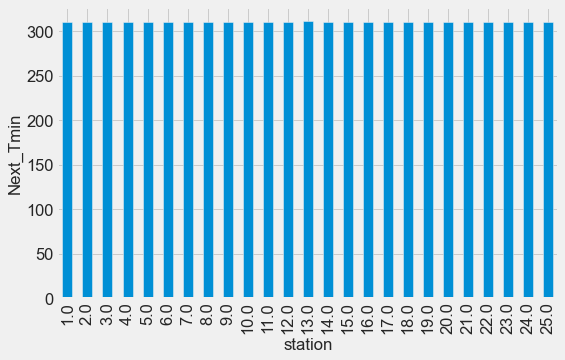

In [566]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df.groupby('station').Next_Tmin.count().plot.bar(ylim=0)
ax.set_ylabel('Next_Tmin')
plt.show()

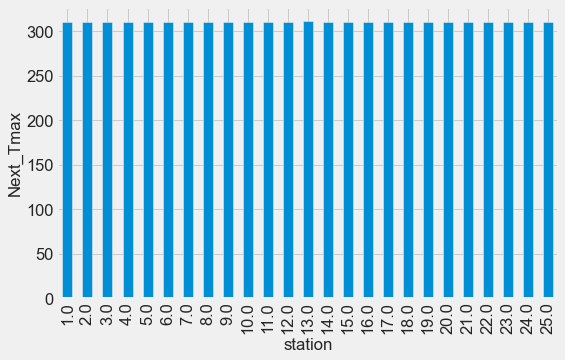

In [567]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df.groupby('station').Next_Tmax.count().plot.bar(ylim=0)
ax.set_ylabel('Next_Tmax')
plt.show()

In [568]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


there is no null values and each and every column is float data type

In [570]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [571]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768498,23.224832,56.759765,88.375048,29.613316,23.571484,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274974,22.932456
std,7.210637,2.956559,2.403037,14.596974,7.157124,2.932898,2.408843,2.173245,33.567001,0.261185,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122558,2.483280
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.782403,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.186419,8.007471,83.904586,0.571696,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [572]:
df.skew()

station             0.000000
Present_Tmax       -0.264428
Present_Tmin       -0.367255
LDAPS_RHmin         0.300139
LDAPS_RHmax        -0.855117
LDAPS_Tmax_lapse   -0.227746
LDAPS_Tmin_lapse   -0.446365
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340284
Next_Tmin          -0.404731
dtype: float64

In [573]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112638,0.131663,-0.066733,-0.166984,0.069107,0.101502,0.005277,-0.133357,0.006919,...,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107974,0.128262
Present_Tmax,0.112638,1.000000,0.618759,-0.204539,-0.301748,0.570084,0.622080,-0.121816,0.135455,-0.311803,...,-0.099446,-0.120370,-0.099593,-0.052626,0.009013,-0.187125,-0.105827,-0.025430,0.610331,0.622727
Present_Tmin,0.131663,0.618759,1.000000,0.123164,-0.015111,0.464108,0.769656,-0.034679,-0.009250,0.084445,...,0.068173,-0.046124,-0.062978,-0.078465,-0.043454,-0.250270,-0.146321,0.053570,0.471820,0.796674
LDAPS_RHmin,-0.066733,-0.204539,0.123164,1.000000,0.579141,-0.564580,0.086763,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244066,-0.437856,0.095077
LDAPS_RHmax,-0.166984,-0.301748,-0.015111,0.579141,1.000000,-0.373404,-0.110510,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149244,-0.283690,-0.071945
LDAPS_Tmax_lapse,0.069107,0.570084,0.464108,-0.564580,-0.373404,1.000000,0.633582,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047993,0.827127,0.586802
LDAPS_Tmin_lapse,0.101502,0.622080,0.769656,0.086763,-0.110510,0.633582,1.000000,-0.125993,-0.130572,0.010562,...,0.000843,-0.085822,-0.091713,-0.093266,-0.025870,-0.189386,-0.180079,0.142583,0.598632,0.874984
LDAPS_WS,0.005277,-0.121816,-0.034679,0.294361,0.135333,-0.311996,-0.125993,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342725,-0.096562
LDAPS_LH,-0.133357,0.135455,-0.009250,-0.070858,0.238579,0.048010,-0.130572,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157625,-0.055411
LDAPS_CC1,0.006919,-0.311803,0.084445,0.613818,0.436652,-0.438439,0.010562,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452532,-0.010998


<AxesSubplot:>

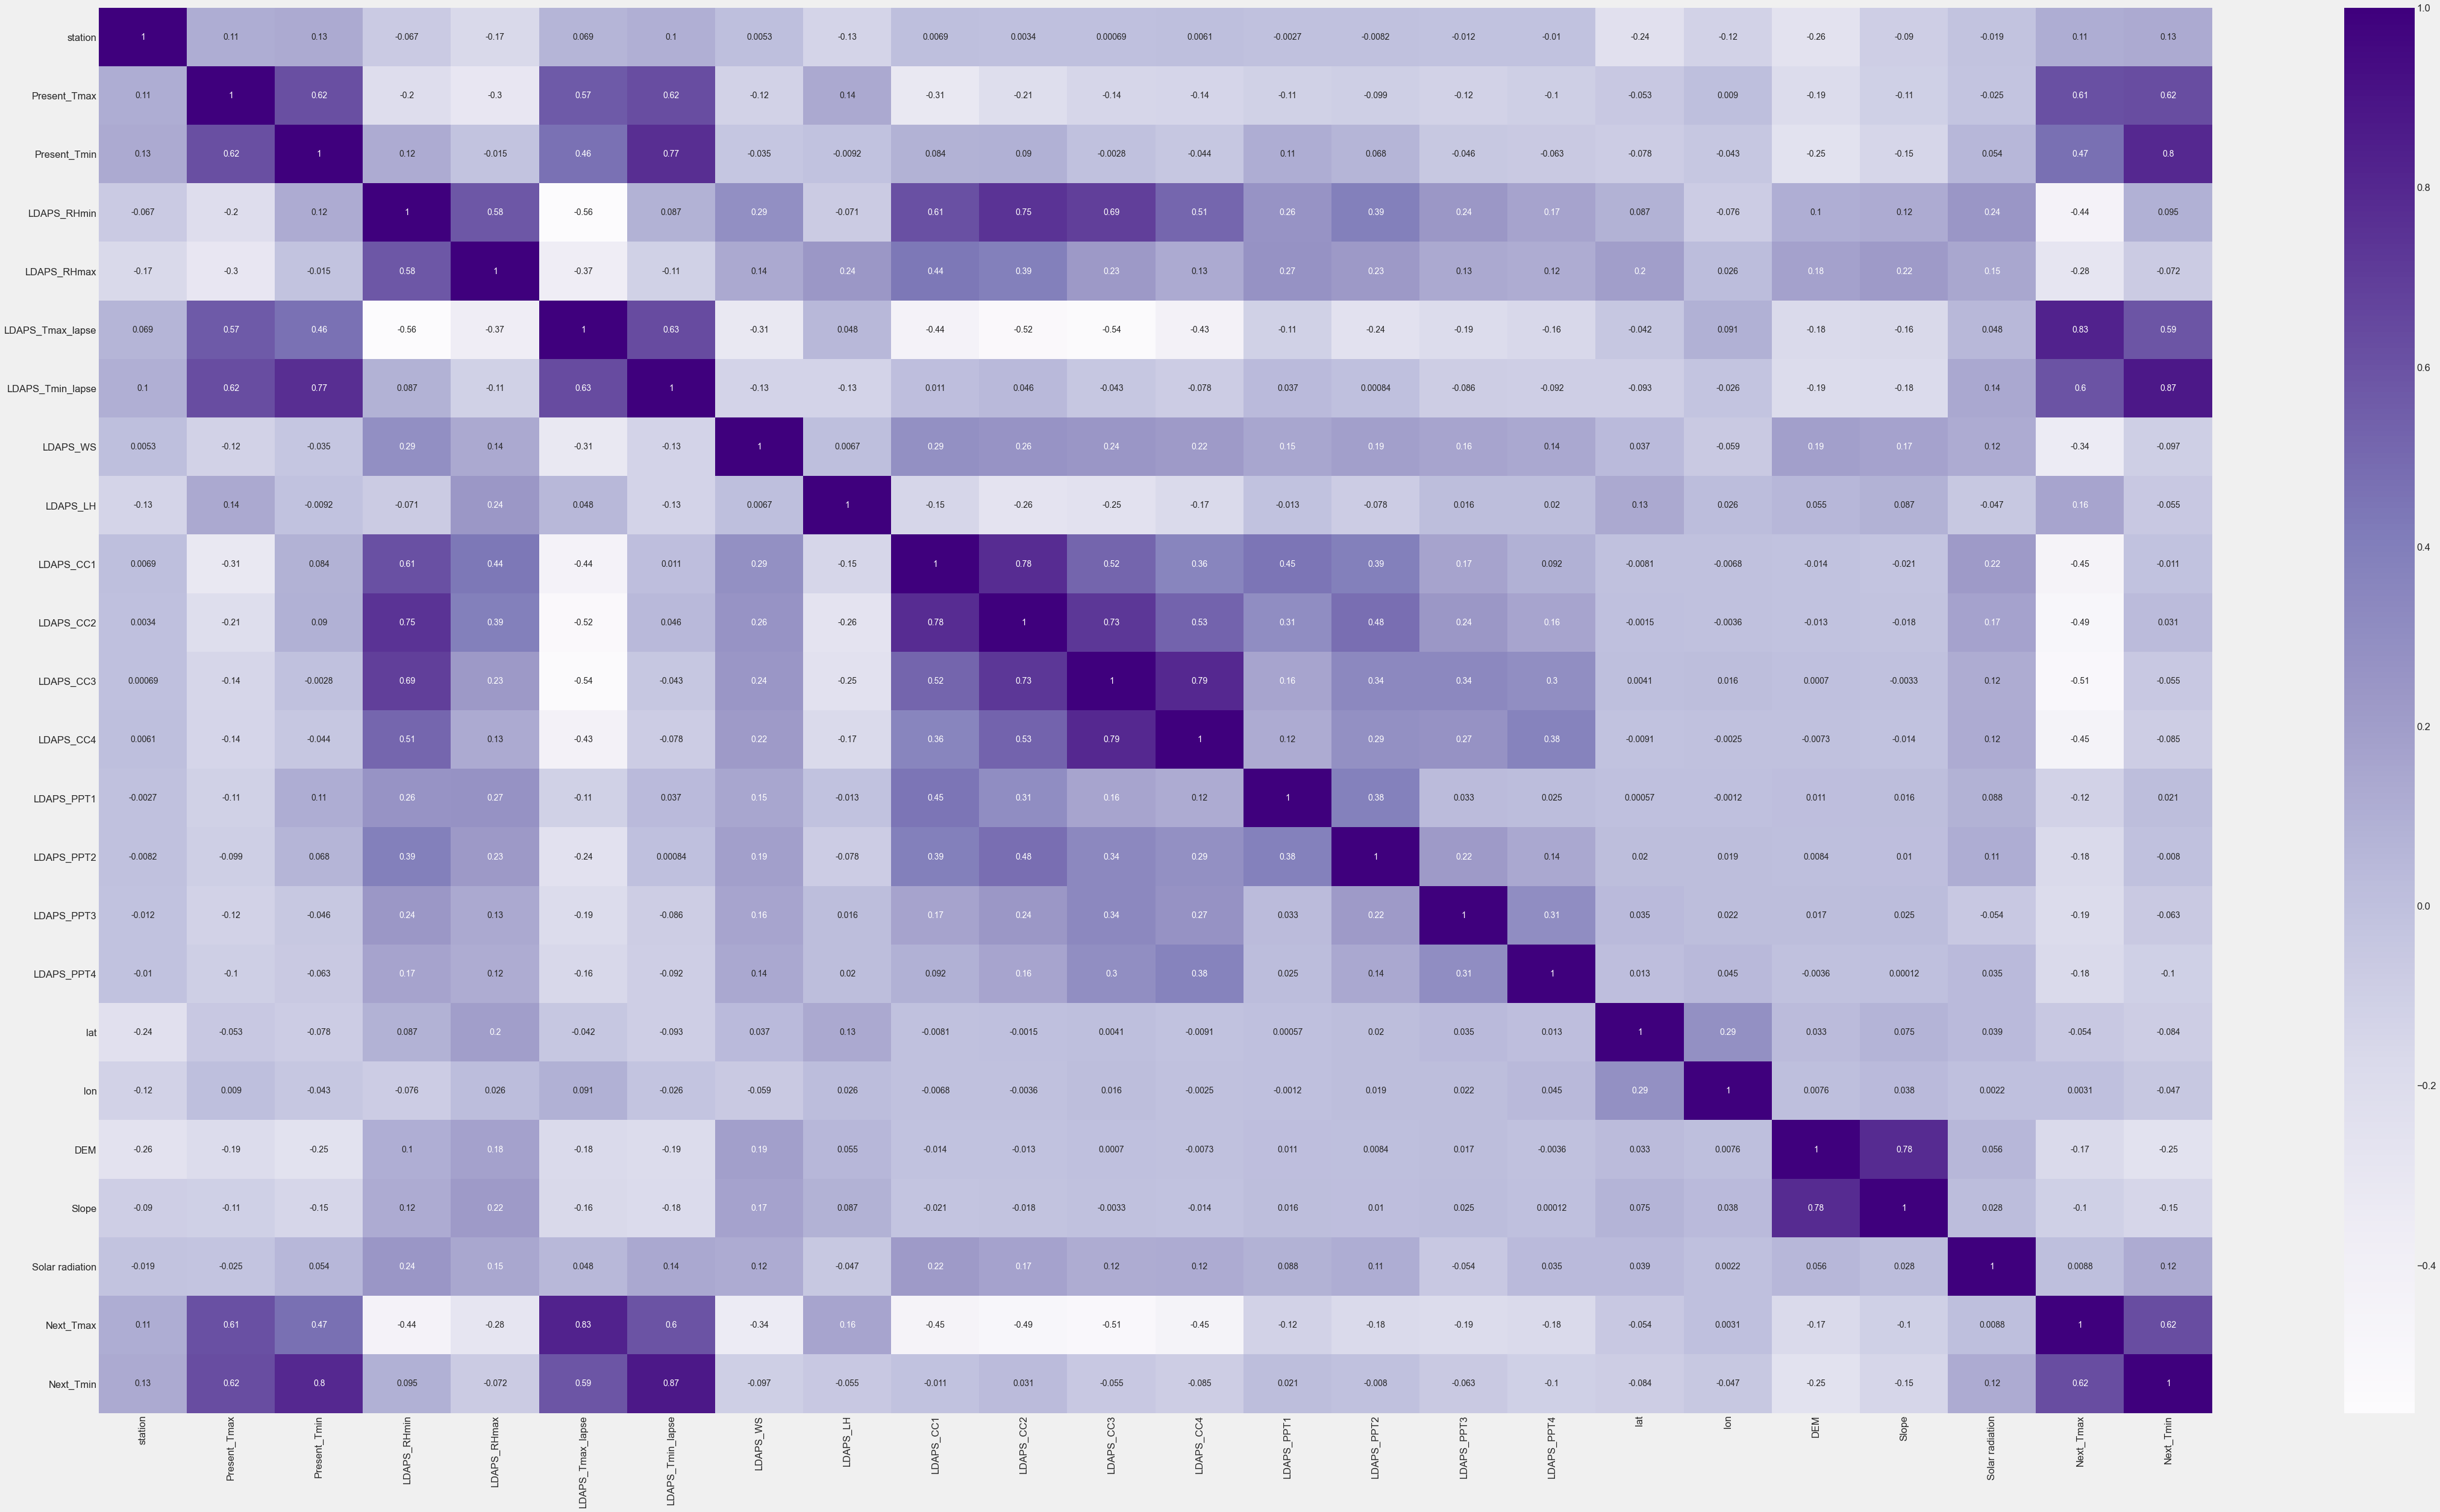

In [574]:
fig=plt.figure(figsize=(70,40))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Purples")

correlation of columns with each other

In [575]:
#columns=df.columns

#for i in df[columns]:
    #plt.figure()
    #sns.displot(df[i])

In [576]:
#columns=df.columns

#for i in df[columns]:
    #plt.figure()
    #df[i].plot.box()

outliers present in many columns

<AxesSubplot:xlabel='LDAPS_PPT1'>

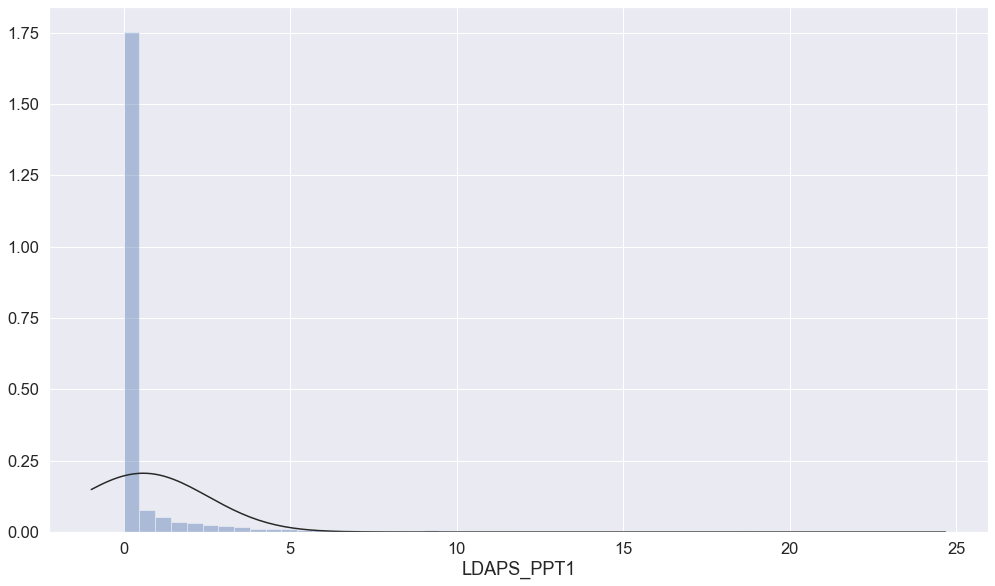

In [577]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.LDAPS_PPT1, kde=False, fit=norm)

<AxesSubplot:xlabel='LDAPS_PPT2'>

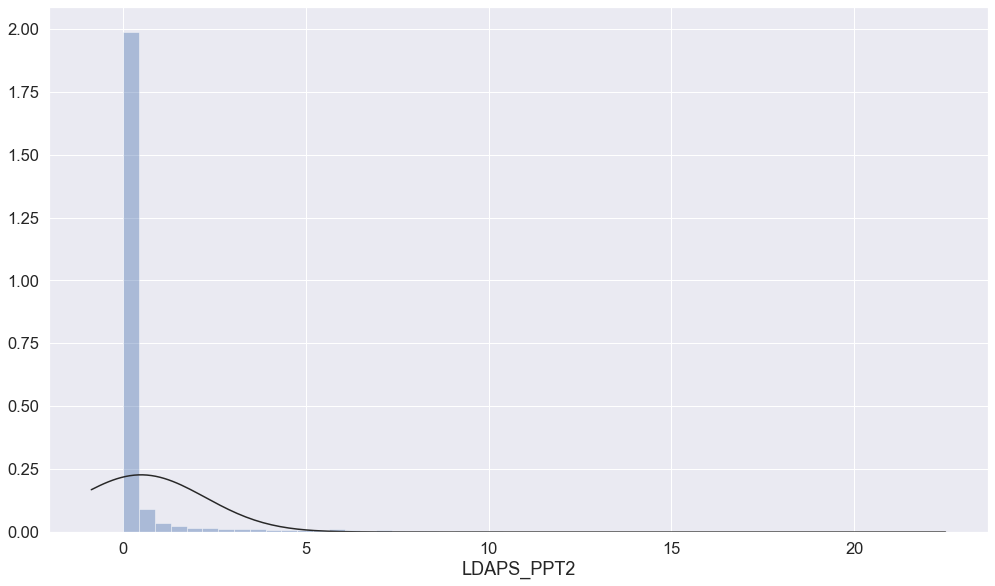

In [578]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.LDAPS_PPT2, kde=False, fit=norm)

<AxesSubplot:xlabel='LDAPS_PPT3'>

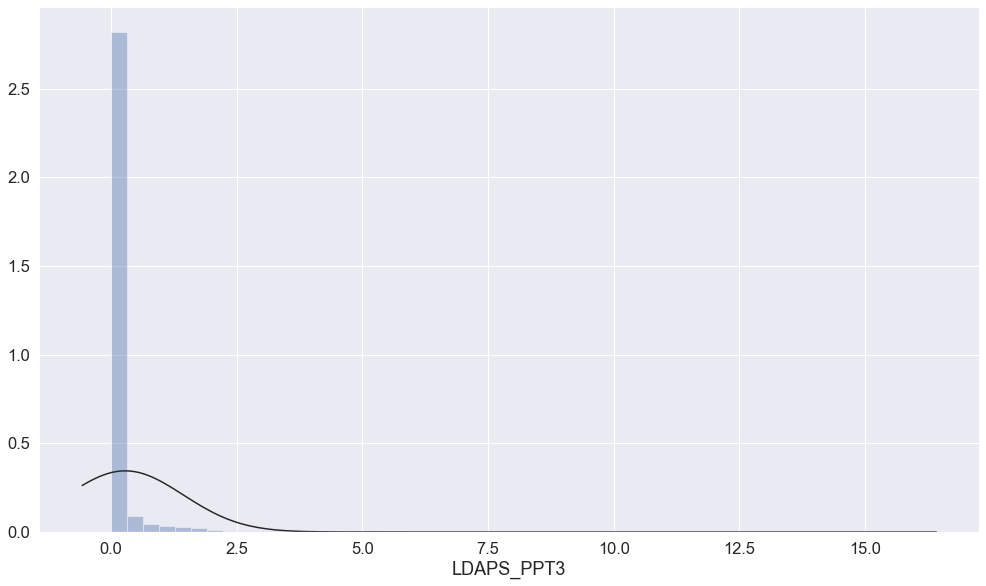

In [579]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.LDAPS_PPT3, kde=False, fit=norm)

<AxesSubplot:xlabel='LDAPS_PPT4'>

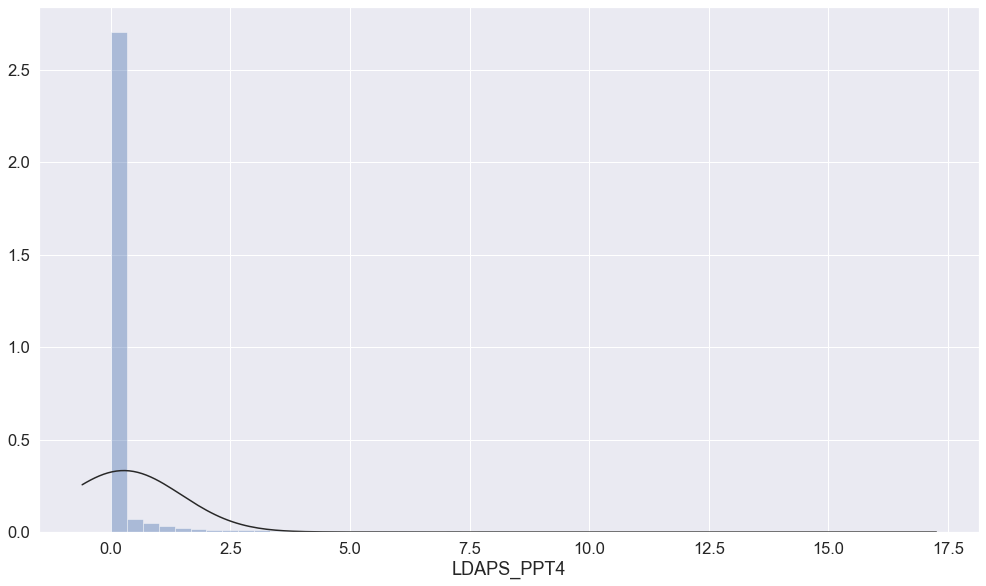

In [580]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.LDAPS_PPT4, kde=False, fit=norm)

In [581]:
#sns.pairplot(df)

In [582]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [583]:
from scipy.stats import zscore

In [584]:
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [585]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (7752, 24)
shape after          : (6897, 24)
pecentage loss       : 0.11029411764705882


removed outliers with zscore and there is 0.11% data loss now we will try with IQR also

In [586]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1

In [587]:
df_new1=df[~((df<(q1-1.5*IQR)) |(df>(q3+1.5*IQR))).any(axis=1)]

In [588]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new1.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new1.shape[0])/df.shape[0])

shape before and after
shape before         : (7752, 24)
shape after          : (3268, 24)
pecentage loss       : 0.5784313725490197


With IQR there is 57% data loss so we will go through the zscore

now we will train 2 models as there are 2 outputs to be predicted

# Model to predict Next_Tmax column 

In [589]:
x=df_new.drop(["Next_Tmax","Next_Tmin"],axis=1)
y=df_new["Next_Tmax"]

In [590]:
x.shape

(6897, 22)

In [591]:
y.shape

(6897,)

In [592]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [593]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")

At random state 0,the training accuracy is:- 0.7544530040477344
At random state 0,the testing accuracy is:- 0.7478649696274022
At random state 1,the training accuracy is:- 0.7478940241047083
At random state 1,the testing accuracy is:- 0.7636949569545277
At random state 2,the training accuracy is:- 0.7612663293155894
At random state 2,the testing accuracy is:- 0.7321469777347115
At random state 3,the training accuracy is:- 0.756659711815279
At random state 3,the testing accuracy is:- 0.7438799373776197
At random state 4,the training accuracy is:- 0.7578814136452275
At random state 4,the testing accuracy is:- 0.7395040884813608
At random state 5,the training accuracy is:- 0.7526578204388428
At random state 5,the testing accuracy is:- 0.7527931367543826
At random state 6,the training accuracy is:- 0.7502305712238901
At random state 6,the testing accuracy is:- 0.7580957482370775
At random state 7,the training accuracy is:- 0.751424422048989
At random state 7,the testing accuracy is:- 0.755

At random state 78,the training accuracy is:- 0.7523067521551609
At random state 78,the testing accuracy is:- 0.753530449452655
At random state 79,the training accuracy is:- 0.7541046866780503
At random state 79,the testing accuracy is:- 0.7489992995793006
At random state 80,the training accuracy is:- 0.7612100126293931
At random state 80,the testing accuracy is:- 0.7317153661066799
At random state 81,the training accuracy is:- 0.7577185402104218
At random state 81,the testing accuracy is:- 0.7398613405053411
At random state 82,the training accuracy is:- 0.7525653119144404
At random state 82,the testing accuracy is:- 0.7532647114407598
At random state 83,the training accuracy is:- 0.7530126170375506
At random state 83,the testing accuracy is:- 0.752053891422054
At random state 84,the training accuracy is:- 0.7470736049939715
At random state 84,the testing accuracy is:- 0.764259049137479
At random state 85,the training accuracy is:- 0.7522368310128877
At random state 85,the testing accu

In [594]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=76)
lr.fit(x_train,y_train)

LinearRegression()

In [595]:
pred_test=lr.predict(x_test)

In [596]:
print(r2_score(y_test,pred_test))

0.753049269296963


In [597]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

In [598]:
Train_accuracy

-0.7547327336709637

In [599]:
Test_accuracy

0.753049269296963

In [600]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [601]:
y_pred = reg_rf.predict(x_test)

In [602]:
reg_rf.score(x_train, y_train)

0.9825334512255562

In [603]:
reg_rf.score(x_test, y_test)

0.8783474819019265

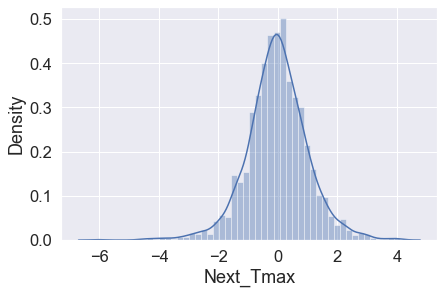

In [604]:
sns.distplot(y_test-y_pred)
plt.show()

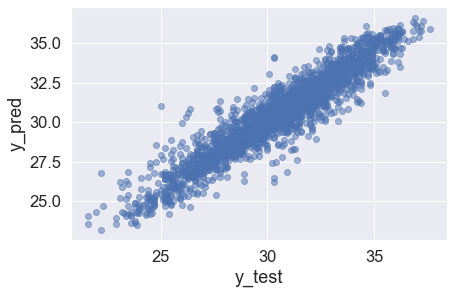

In [605]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [606]:
from sklearn import metrics

In [607]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 0.7622710144927535
MSE: 1.0570059753623187
RMSE: 1.0281079590015432


In [608]:
metrics.r2_score(y_test, y_pred)

0.8783474819019265

We will go through the random forest regressor as it gives better accuracy as 98% for training and 87% for testing data

# Model to predict Next_Tmin column 

In [609]:
Y=df_new["Next_Tmin"]

In [610]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [611]:
for i in range(0,100):
    x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.3,random_state=i)
    lr.fit(x_train,Y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(Y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(Y_test,pred_test)}")

At random state 0,the training accuracy is:- 0.8158093490754752
At random state 0,the testing accuracy is:- 0.8060680351022583
At random state 1,the training accuracy is:- 0.8113827448945357
At random state 1,the testing accuracy is:- 0.8166874597424008
At random state 2,the training accuracy is:- 0.8194895878377287
At random state 2,the testing accuracy is:- 0.7970229888204544
At random state 3,the training accuracy is:- 0.8150877633289539
At random state 3,the testing accuracy is:- 0.8084185980339325
At random state 4,the training accuracy is:- 0.8182606290512475
At random state 4,the testing accuracy is:- 0.8000302754241656
At random state 5,the training accuracy is:- 0.8148102387076055
At random state 5,the testing accuracy is:- 0.8089780859437664
At random state 6,the training accuracy is:- 0.8142489009734761
At random state 6,the testing accuracy is:- 0.8104431893942207
At random state 7,the training accuracy is:- 0.807607500786033
At random state 7,the testing accuracy is:- 0.82

At random state 65,the training accuracy is:- 0.8158941664909013
At random state 65,the testing accuracy is:- 0.80683334539121
At random state 66,the training accuracy is:- 0.8112118454656779
At random state 66,the testing accuracy is:- 0.8162136325263281
At random state 67,the training accuracy is:- 0.8123353702710377
At random state 67,the testing accuracy is:- 0.8145510677778343
At random state 68,the training accuracy is:- 0.8132078098513027
At random state 68,the testing accuracy is:- 0.8126437209101641
At random state 69,the training accuracy is:- 0.8117567124002201
At random state 69,the testing accuracy is:- 0.8158409156498587
At random state 70,the training accuracy is:- 0.8143654269366725
At random state 70,the testing accuracy is:- 0.8102452325494484
At random state 71,the training accuracy is:- 0.81181810767804
At random state 71,the testing accuracy is:- 0.8157820484953442
At random state 72,the training accuracy is:- 0.81344824748536
At random state 72,the testing accurac

In [612]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.3,random_state=7)
lr.fit(x_train,Y_train)

LinearRegression()

In [613]:
pred_test=lr.predict(x_test)

In [614]:
print(r2_score(Y_test,pred_test))

0.8247726601188975


In [615]:
Train_accuracy=r2_score(Y_train,pred_train)
Train_accuracy

-0.8898817516897464

In [616]:
from sklearn.ensemble import RandomForestRegressor
reg1_rf = RandomForestRegressor()
reg1_rf.fit(x_train, Y_train)

RandomForestRegressor()

In [617]:
Y_pred = reg1_rf.predict(x_test)

In [618]:
reg1_rf.score(x_train, Y_train)

0.9839122067825435

In [619]:
reg1_rf.score(x_test, Y_test)

0.8949662643437435

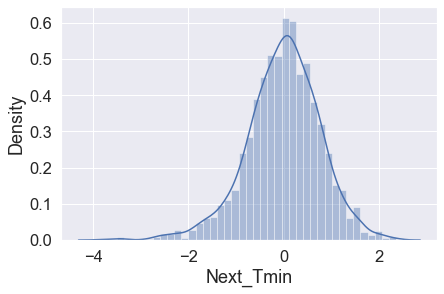

In [620]:
sns.distplot(Y_test-Y_pred)
plt.show()

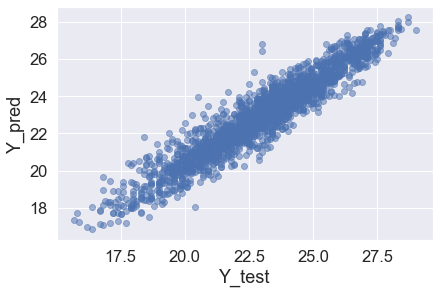

In [621]:
plt.scatter(Y_test, Y_pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [622]:
from sklearn import metrics

In [623]:
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


MAE: 0.5926405797101447
MSE: 0.5991069913043476
RMSE: 0.7740200199635328


In [624]:
metrics.r2_score(Y_test, Y_pred)

0.8949662643437435

We will go through the random forest regressor as it gives better accuracy as 98% for training and 89% for testing data

In [625]:
import joblib
joblib.dump(reg1_rf,"Next_Tmin")
print("object of the dataset Next_Tmin column has been created")

object of the dataset Next_Tmin column has been created


In [626]:
import joblib
joblib.dump(reg_rf,"Next_Tmax")
print("object of the dataset Next_Tmax column has been created")

object of the dataset Next_Tmax column has been created
